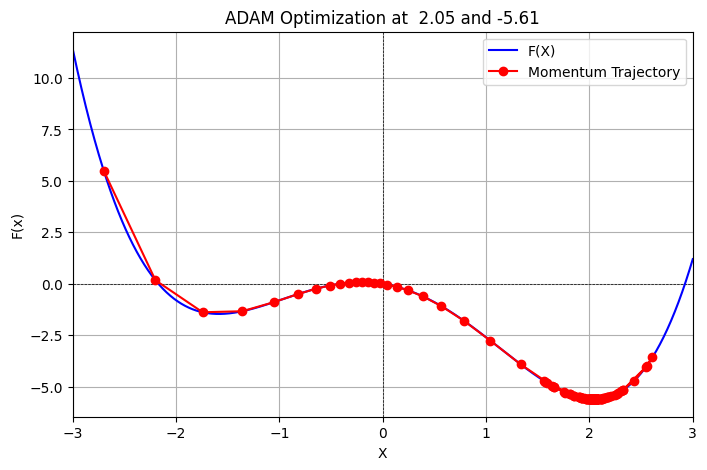

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 0.3*x**4 - 0.1*x**3 - 2*x**2 - 0.8*x 
    
def df(x):  
    return 1.2*x**3 - 0.3*x**2 - 4*x - 0.8


class ADAM():
    def __init__(self, learningRate=0.5, iters=1000,beta1 = 0.9,beta2 = 0.9 ,epsilon = 1e-8,m=0,v=0 ):
        self.learningRate=learningRate
        self.iters=iters
        self.beta1=beta1
        self.beta2=beta2
        self.epsilon=epsilon
        self.x_min=None
        self.y_min=None
        self.m=m
        self.v=v

    def ADAM_Calc(self, df, f,x):
        x_opt=[]
        y_opt=[]
        x_opt.append(x)
        y_opt.append(f(x))
        for i in range(1, self.iters):
        
            gradient = df(x)
            self.m = self.beta1 * self.m + (1 - self.beta1) * gradient
            self.v = self.beta2 * self.v + (1 - self.beta2) * gradient**2
            m_hat = self.m / (1 - self.beta1**i)
            v_hat = self.v / (1 - self.beta2**i)
            x_init = x - self.learningRate * m_hat / (np.sqrt(v_hat) + self.epsilon)
            y_result= f(x_init)
            x_opt.append(x_init)
            y_opt.append(y_result)
            x=x_init

        self.x_min= x
        self.y_min= y_result
        r_min,r_max=-3,3
        ADAM.plot(self,r_min,r_max,f,x_opt,y_opt)
        return  


    def plot(self,r_min,r_max,f,x_optim,y_optim):
        x = np.linspace(r_min, r_max, 1000)
        results = f(x)
        plt.figure(figsize=(8, 5))
        plt.title(f"ADAM Optimization at  {np.round(self.x_min,2)} and {np.round(self.y_min,2)}")
        plt.xlabel("X")
        plt.ylabel("F(x)")
        plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
        plt.axvline(0, color='black', linewidth=0.5, linestyle="--")
        plt.grid(True)
        plt.xlim(r_min, r_max)
        plt.plot(x, results, color="blue", label="F(X)")
        plt.plot(x_optim, y_optim, color="red",marker='o', label="Momentum Trajectory")
        plt.legend()
        plt.show()
        return  


Adam=ADAM()
Adam.ADAM_Calc(df,f,-2.7) 
